In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn

In [5]:
## Modelling
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [7]:
df = pd.read_csv("data/stud.csv")

In [8]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
X = df.drop(columns=['math_score'],axis=1)

In [10]:
y = df['math_score']

In [11]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [12]:
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

In [13]:
print("Categories in 'gender' variable:  ",end=" ")
print(df['gender'].unique())
print()
print("Categories in 'race_ethnicity' variable  ",end=" ")
print(df['race_ethnicity'].unique())
print()
print("Categories in 'parental_level_of_education' variable  ",end=" ")
print(df['parental_level_of_education'].unique())
print()
print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())
print()
print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())


Categories in 'gender' variable:   ['female' 'male']

Categories in 'race_ethnicity' variable   ['group B' 'group C' 'group A' 'group D' 'group E']

Categories in 'parental_level_of_education' variable   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Categories in 'lunch' variable:      ['standard' 'free/reduced']

Categories in 'test preparation course' variable:      ['none' 'completed']


### Create column Transformer with 3 types of transformer 

Column Transformer :- helps us work with numerical and categorical data separately

In [14]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_features),
        ("StandardScaler",numeric_transformer,num_features)
    ]
)

In [15]:
X = preprocessor.fit_transform(X)

In [16]:
X.shape

(1000, 19)

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [18]:
X_train.shape ,X_test.shape

((800, 19), (200, 19))

In [19]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2_square = r2_score(true,predicted)
    return mae, rmse, r2_square

In [20]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "K-Neighbors Regressor": KNeighborsRegressor(n_neighbors=7)
}
model_list = []
r2_list = []

for i in range(len(list(models))):
    # Model Training
    model = list(models.values())[i]
    model.fit(X_train, y_train)
    
    # Making predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print("Model performance for Training set")
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))
    
    print("-----------------------------------------------------")
    
    print("Model performance for Test set")
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')


Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.2845
- Mean Absolute Error: 4.2268
- R2 Score: 0.8788
-----------------------------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.5879
- Mean Absolute Error: 4.4134
- R2 Score: 0.8622


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.6102
- Mean Absolute Error: 5.1990
- R2 Score: 0.8104
-----------------------------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.7021
- Mean Absolute Error: 5.3566
- R2 Score: 0.8018


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.2818
- Mean Absolute Error: 4.2268
- R2 Score: 0.8789
-----------------------------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.5674
- Mean Absolute Error: 4.3880
- R2 Score: 0.8632


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.0500
- Mean Absolute Error: 

In [21]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=["Model name","R2_Score"]).sort_values(by=['R2_Score'],ascending=False)

,Model name,R2_Score
2,Ridge,0.863213
0,Linear Regression,0.862206
6,CatBoosting Regressor,0.857797
4,Random Forest Regressor,0.854581
7,AdaBoost Regressor,0.827886
5,XGBRegressor,0.818506
8,K-Neighbors Regressor,0.806486
1,Lasso,0.801773
3,Decision Tree,0.750884


## Linear Regression 

In [22]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 86.22


## Ploting y_pred and y_test

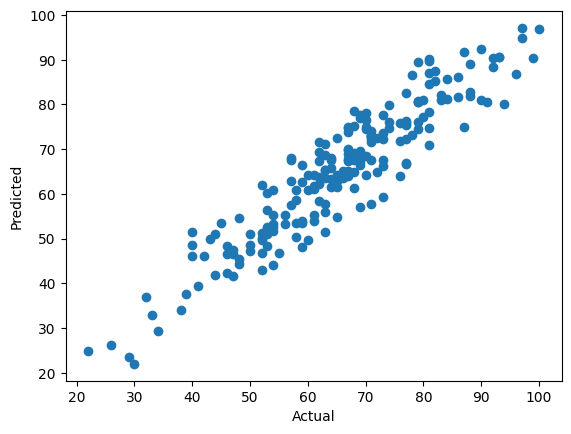

In [23]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

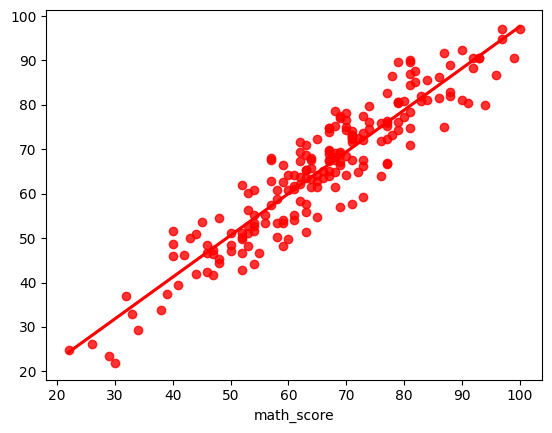

In [24]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [25]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
993,62,62.18750,-0.18750
859,87,74.93750,12.06250
298,40,48.62500,-8.62500
553,77,66.71875,10.28125
672,69,69.50000,-0.50000
...,...,...,...
679,63,63.56250,-0.56250
722,74,76.15625,-2.15625
215,84,81.15625,2.84375
653,65,61.50000,3.50000
